# Website Performance Analysis

## Problem Statement
Understanding how a website performs is essential for improving user experience, boosting engagement, and driving business growth. Website performance analysis focuses on tracking and evaluating key metrics that reflect how visitors interact with a site and how effectively the site supports business goals.  

Poor performance can reduce user satisfaction, lower conversion rates, and negatively affect brand reputation, while strong performance can lead to higher retention and profitability.  

In this project, we will use Python to analyze a dataset containing metrics such as:  
- Traffic source (e.g., Direct, Organic Social)  
- Date and hour of user sessions  
- Number of users and sessions  
- Engaged sessions and engagement rate  
- Average engagement time per session  
- Events per session and total event counts  

The objective is to uncover insights about user behavior, identify the most effective traffic channels, and highlight opportunities to enhance website engagement and overall performance.


In [1]:
import pandas as pd

data = pd.read_csv("data-export.csv")

print(data.head())

          # ----------------------------------------  \
0  Session primary channel group (Default channel...   
1                                             Direct   
2                                     Organic Social   
3                                             Direct   
4                                     Organic Social   

                 Unnamed: 1 Unnamed: 2 Unnamed: 3        Unnamed: 4  \
0  Date + hour (YYYYMMDDHH)      Users   Sessions  Engaged sessions   
1                2024041623        237        300               144   
2                2024041719        208        267               132   
3                2024041723        188        233               115   
4                2024041718        187        256               125   

                            Unnamed: 5                 Unnamed: 6  \
0  Average engagement time per session  Engaged sessions per user   
1                   47.526666666666700         0.6075949367088610   
2                    32.09737

### Note on Dataset
While inspecting the dataset, I noticed that the first row contains errors, which is common when data is exported from websites.  
The actual data starts from the second row, so we need to adjust the dataset accordingly.


In [2]:
# fixing header issue (first row is actually column names)
cols = data.iloc[0]
data = data.drop(0)              # remove that row
data.columns = cols              # set new column names
data.reset_index(drop=True, inplace=True)

data.head()


,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


### Now, let’s have a look at the column info and the summary statistics of the data:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [4]:
print(data.describe())

0      Session primary channel group (Default channel group)  \
count                                                3182      
unique                                                  7      
top                                                Direct      
freq                                                  672      

0      Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
count                      3182  3182     3182             3182   
unique                      672   147      180              103   
top                  2024042417     1        1                0   
freq                          6   335      340              393   

0      Average engagement time per session Engaged sessions per user  \
count                                 3182                      3182   
unique                                2823                       808   
top                                      0                         0   
freq                                   170             

### Converting and Preparing the Date Column
Next, we’ll convert the date column to a proper datetime format. This will allow us to analyze trends over time and group the data by date or hour for further insights.


In [6]:
# Convert the date column to datetime and numeric columns to numbers
data['Date + hour'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

# Group by date & hour and sum Users and Sessions
daily_summary = data.groupby('Date + hour')[['Users', 'Sessions']].sum().reset_index()

daily_summary.head()


,Date + hour,Users,Sessions
0,2024-04-06 00:00:00,197,270
1,2024-04-06 01:00:00,107,142
2,2024-04-06 02:00:00,115,142
3,2024-04-06 03:00:00,93,122
4,2024-04-06 04:00:00,79,102


The dataset is now summarized by date and hour, ready for time-based analysis and trend exploration.

### Visualizing Users and Sessions Over Time
Next, we'll look at how the total number of users and sessions changes over time to identify trends or patterns in website activity.


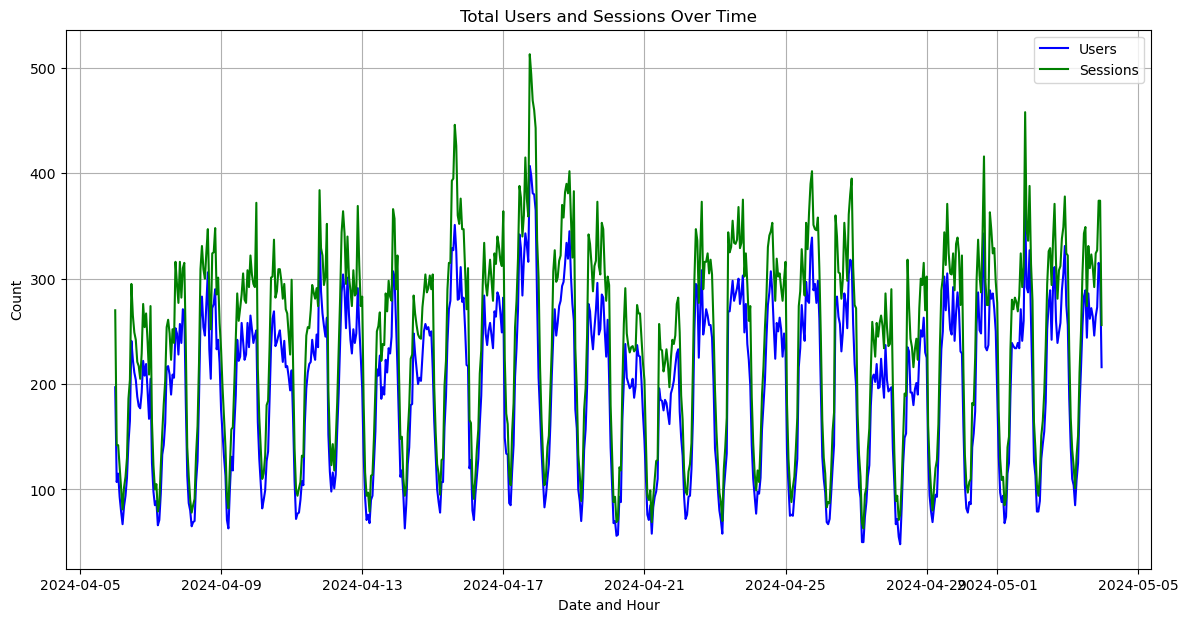

In [7]:
import matplotlib.pyplot as plt

# Plot total users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(daily_summary['Date + hour'], daily_summary['Users'], label='Users', color='blue')
plt.plot(daily_summary['Date + hour'], daily_summary['Sessions'], label='Sessions', color='green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()


### Observations
From the graph, we can see that users and sessions fluctuate throughout the day.  
There seems to be a daily pattern, with peaks possibly corresponding to higher traffic periods or marketing campaigns.  
As expected, the trends for users and sessions are similar, since more users generally lead to more sessions.


### User Engagement Analysis
Next, we’ll examine how users interact with the website. Key metrics include:  
- Average engagement time per session  
- Engagement rate  
- Events per session  
- Engaged sessions per user  

We’ll convert these columns to numeric and summarize them over time to explore engagement trends.


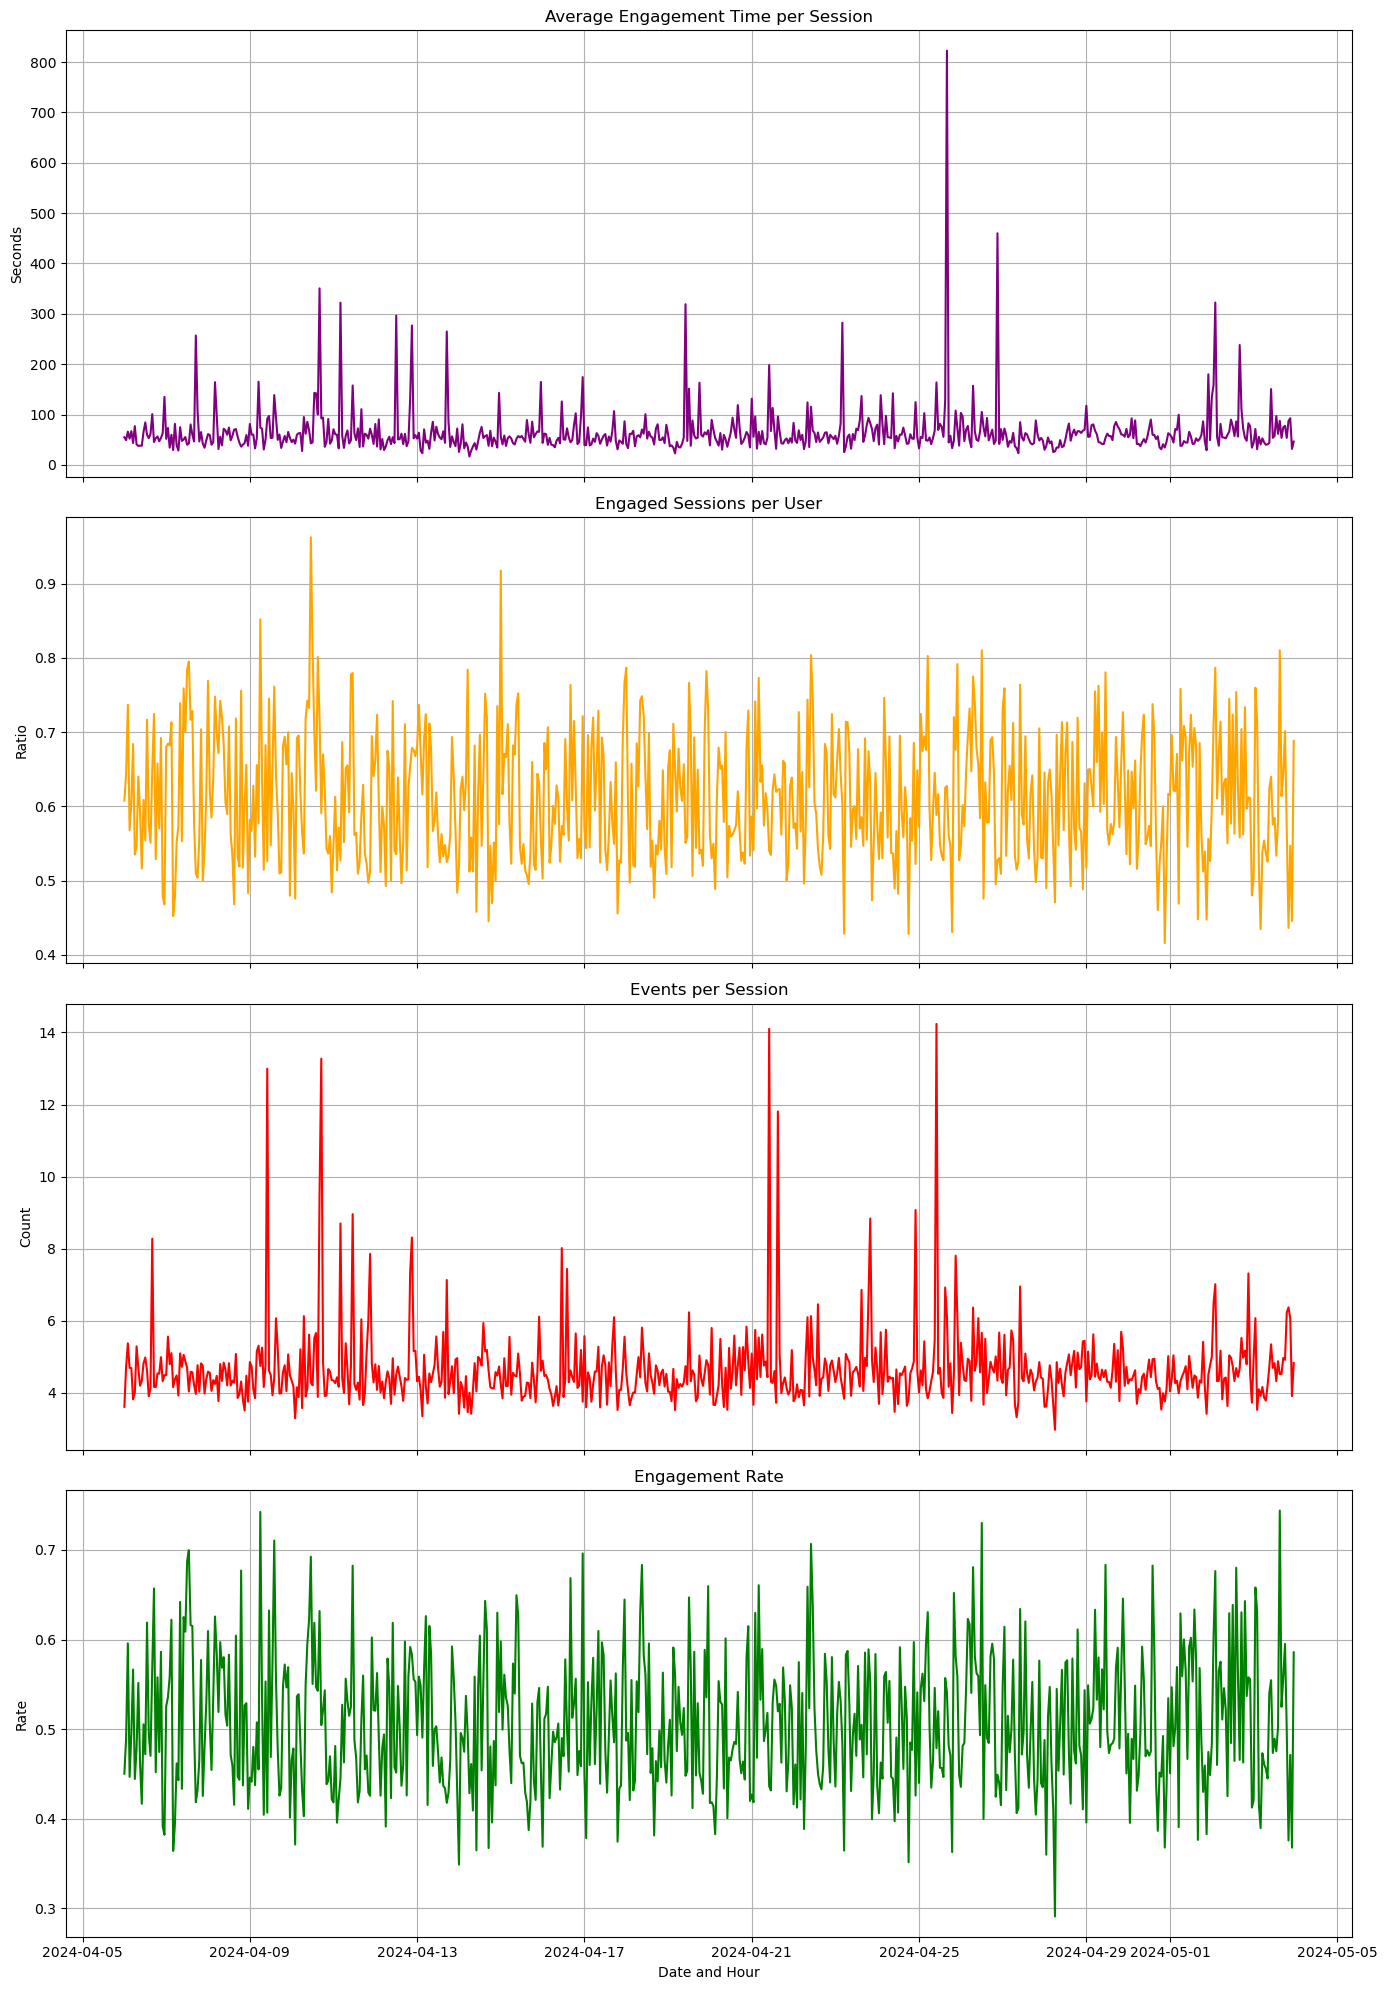

In [9]:
# Convert relevant columns to numeric
eng_cols = ['Engaged sessions', 'Average engagement time per session',
            'Engaged sessions per user', 'Events per session', 'Engagement rate']
for col in eng_cols:
    data[col] = pd.to_numeric(data[col])

# Group by date + hour and calculate mean for engagement metrics
engagement_metrics = data.groupby('Date + hour')[eng_cols[1:]].mean()

# Plot engagement metrics over time
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], color='purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.grid(True)

plt.tight_layout()
plt.show()


### Observations
- **Average Engagement Time per Session (purple):** Shows peaks at certain times, possibly when content or events were particularly engaging.  
- **Engaged Sessions per User (orange):** Generally stable, with occasional increases indicating highly relevant content periods.  
- **Events per Session (red):** Mostly consistent, with some peaks suggesting more interactive features were used.  
- **Engagement Rate (green):** Varies over time, reflecting how effectively different content or acquisition channels drive meaningful interactions.


In [ ]:
# Scatter plots to analyze relationships between engagement metrics
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Avg Engagement Time')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)

axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Avg Engagement Time')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions/User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions/User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


### Insights from Scatter Plots
- **Avg Engagement Time vs Events/Session:** Data points show most sessions have lower engagement time, with events more spread out; higher engagement times are less frequent.  
- **Avg Engagement Time vs Engagement Rate:** Engagement rate tends to increase as session time increases.  
- **Engaged Sessions/User vs Events/Session:** Most users cluster at low values, few users are highly active.  
- **Engaged Sessions/User vs Engagement Rate:** Strong positive correlation; users with more engaged sessions tend to have higher overall engagement.


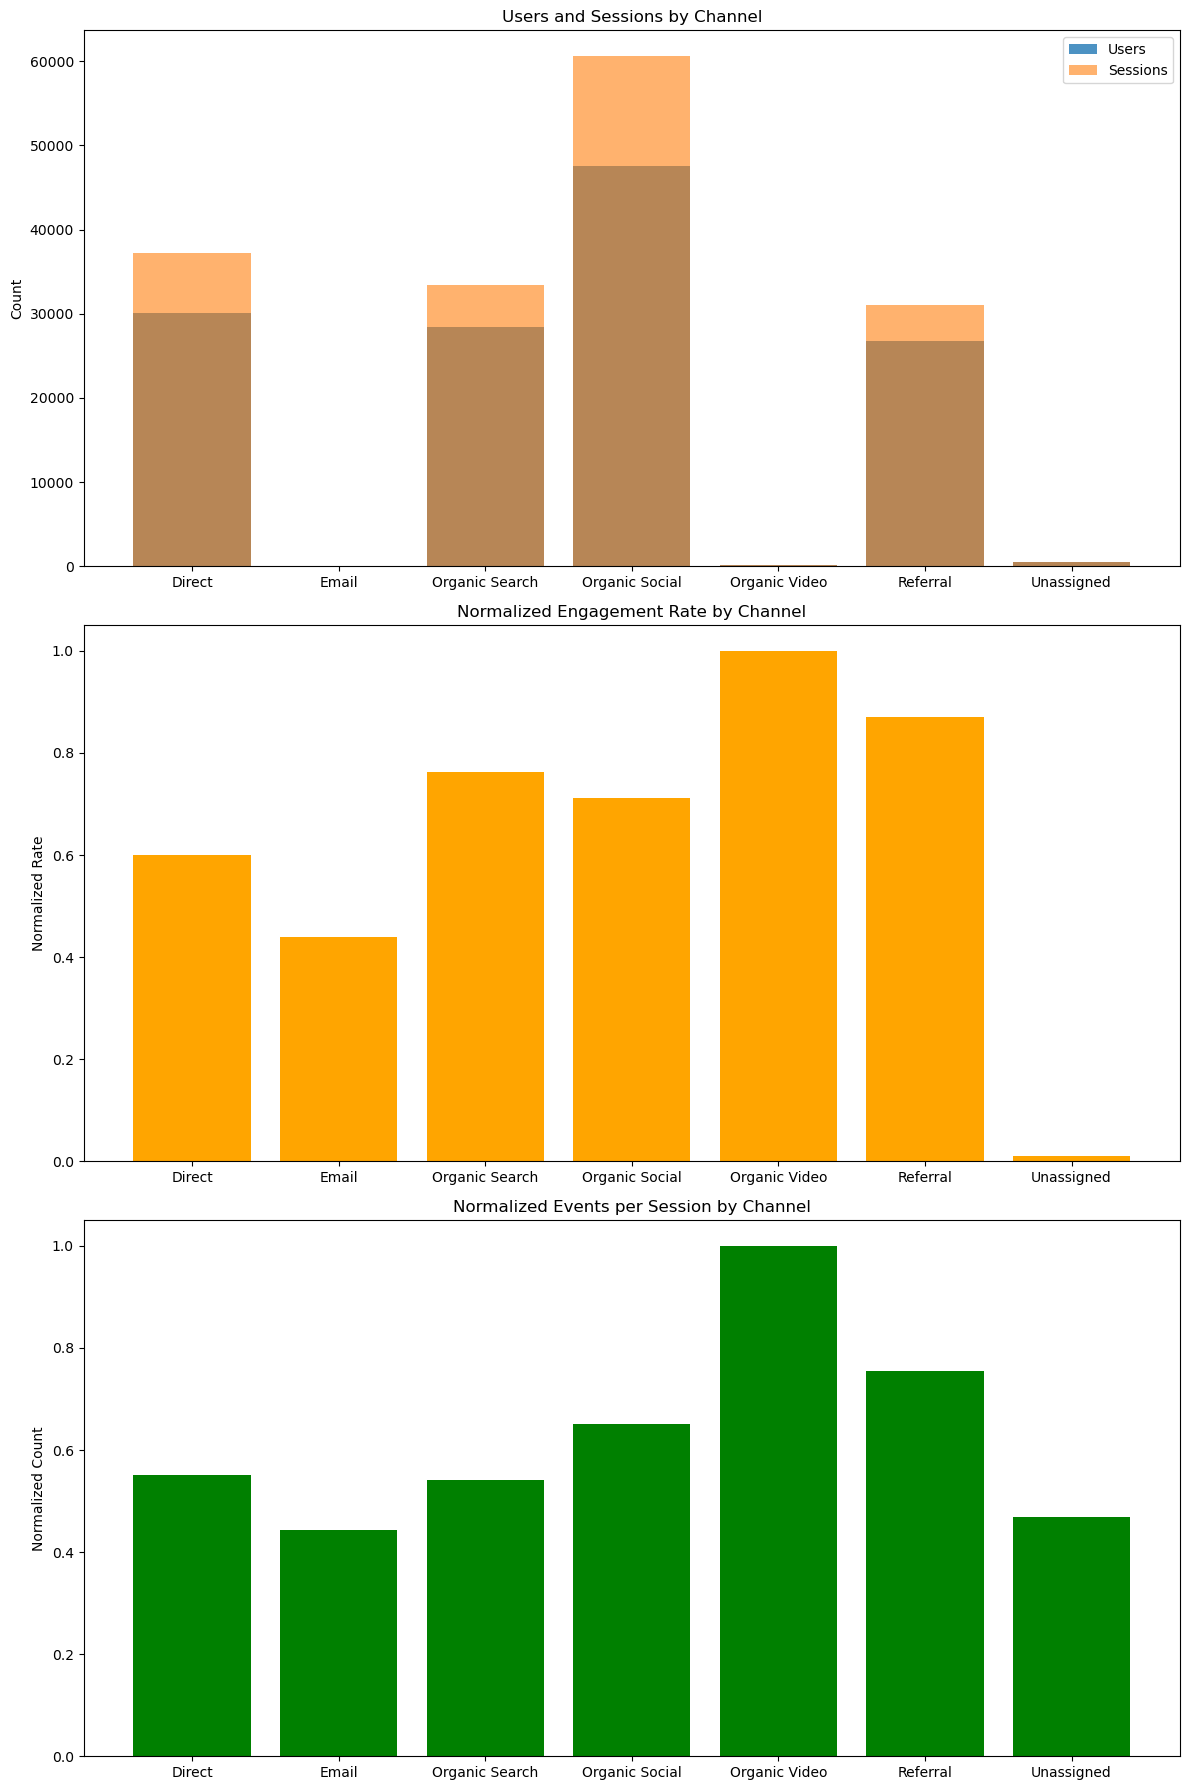

In [11]:
# Aggregate metrics by marketing channel
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# Normalize for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# Plot channel performance
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()


### Observations
- There are clear differences in performance across channels.  
- Organic Search drives the most traffic, but engagement and events per session are lower, suggesting quantity over quality.  
- Channels like Referral and Organic Video have fewer users but higher engagement, indicating stronger interactions with visitors.  
- These insights can help prioritize marketing efforts to balance traffic and engagement.


### Forecasting Website Traffic
Next, we’ll try to predict the website traffic for the next 24 hours using historical session data.  
We’ll use time series analysis to forecast future values, which can help anticipate high-traffic periods and optimize website performance.


C:\Users\HP\AppData\Local\Temp\ipykernel_16220\4077934514.py:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series_data = daily_summary.set_index('Date + hour')['Sessions'].asfreq('H').fillna(method='ffill')
C:\Users\HP\AppData\Local\Temp\ipykernel_16220\4077934514.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = daily_summary.set_index('Date + hour')['Sessions'].asfreq('H').fillna(method='ffill')


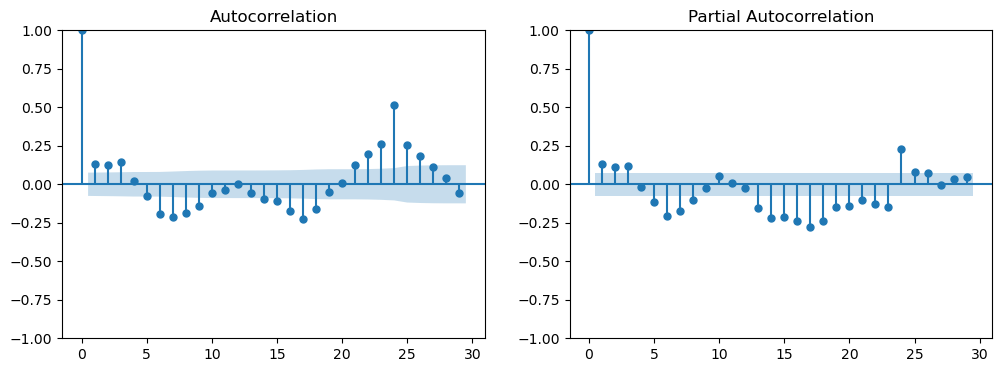

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Prepare time series data for hourly sessions
time_series_data = daily_summary.set_index('Date + hour')['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

# Differencing to remove trend
differenced_series = time_series_data.diff().dropna()

# Plot ACF and PACF to help choose AR and MA orders
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()


#### Interpreting the Plots
- **PACF (Partial Autocorrelation Function):** Helps decide the AR order (p). The first significant spike appears at lag 1, suggesting p = 1.  
- **ACF (Autocorrelation Function):** Helps identify the MA order (q). The first significant spike is at lag 1, with a gradual tailing off, so q = 1 is a reasonable starting point.  
- **Seasonality (d):** Since the data has daily patterns, we set d = 1.  
These parameters will be used to build a SARIMA model to forecast sessions.


C:\Users\HP\AppData\Local\Temp\ipykernel_16220\2733734524.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast,


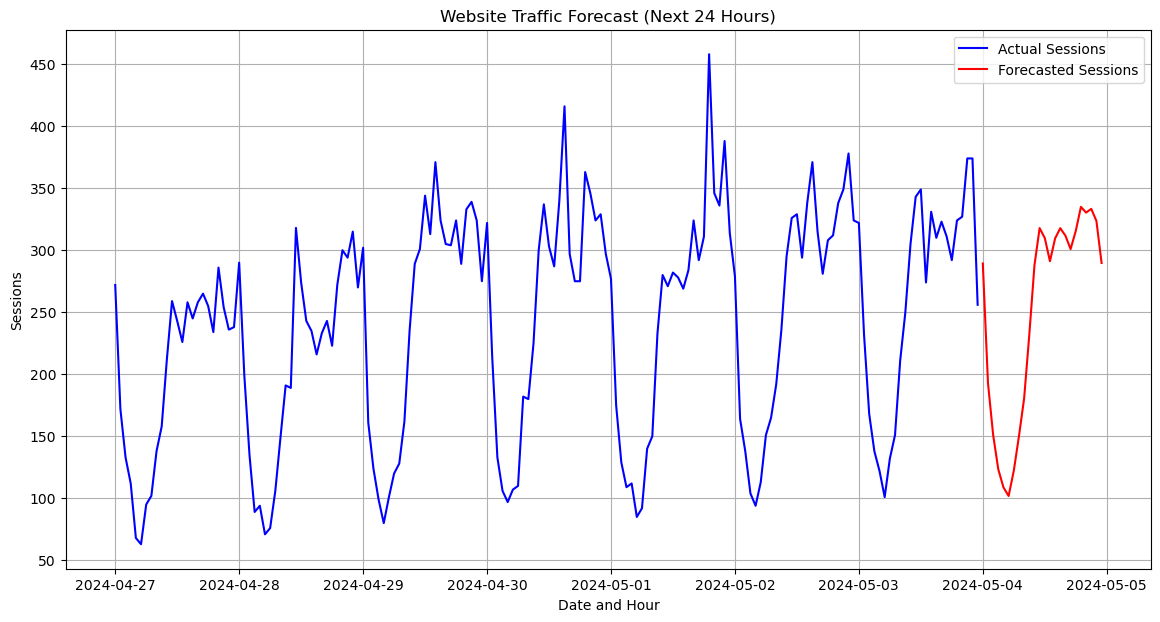

In [13]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
sarima_model = SARIMAX(time_series_data,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# Forecast the next 24 hours
sarima_forecast = sarima_model_fit.forecast(steps=24)

# Plot actual data and forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data[-168:], label='Actual Sessions', color='blue')  # last 7 days
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast,
         label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecast (Next 24 Hours)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()


### Summary
In this project, we analyzed website performance using Python:  

1. **Session Analysis:** Observed traffic trends over time.  
2. **User Engagement Analysis:** Measured how deeply visitors interact with the website.  
3. **Channel Performance:** Compared marketing channels to see which drive the most traffic and engagement.  
4. **Website Traffic Forecasting:** Predicted future traffic patterns to anticipate user activity.  

This comprehensive analysis can help improve user experience, optimize marketing strategies, and plan for high-traffic periods.
